## Data Cleaning Practice

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('marketing_campaign_data_messy.csv')

In [3]:
df.head()

,Campaign_ID,Campaign_Name,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks,Campaign_Tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA


In [4]:
df.columns.to_list()

[' Campaign_ID ',
 'Campaign_Name',
 'Start_Date',
 'End_Date',
 'Channel',
 'Impressions',
 'Clicks ',
 'Spend',
 'Conversions',
 'Active',
 'Clicks',
 'Campaign_Tag']

## step 1: cleaning the header names

In [5]:
df.columns=[col.strip().lower().replace(' ','_') for col in df.columns.to_list()]


In [6]:
df.head(2)

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,clicks,campaign_tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA


## data clean and type change for spend

In [7]:
df['spend']=df['spend'].astype(str).str.replace(r'[^\d.-]','',regex=True)

In [8]:
df.head()

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,clicks,campaign_tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA


In [10]:
df['channel'].value_counts()

channel
TikTok        399
Facebook      391
Email         359
Google Ads    346
Instagram     340
E-mail         21
Insta_gram     19
Tik_Tok        16
Gogle          14
Facebok        14
Name: count, dtype: int64

## Cleaning typos in dataset

In [11]:
cleanup_map={
    'E-mail':'Email',
    'Insta_gram':'Instagram',
    'Tik_Tok':'TikTok',
    'Gogle':'Google',
    'Facebok':'Facebook'  
}

In [14]:
df['channel']=df['channel'].replace(cleanup_map)

In [15]:
df['channel'].value_counts()

channel
TikTok        415
Facebook      405
Email         380
Instagram     359
Google Ads    346
Google         14
Name: count, dtype: int64

In [16]:
df['active'].value_counts()

active
1        319
Yes      306
True     297
No       291
False    281
Y        273
0        253
Name: count, dtype: int64

In [17]:
bool_map={
    'Yes':True,
    '1':True,
    'True':True,
    'No':False,
    'False':False,
    'Y':True,
    '0':False
}

In [18]:
df['active']=df['active'].replace(bool_map).astype(bool)


C:\Users\Raj\AppData\Local\Temp\ipykernel_19096\988798849.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['active']=df['active'].replace(bool_map).astype(bool)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    2020 non-null   object 
 1   campaign_name  2020 non-null   object 
 2   start_date     2020 non-null   object 
 3   end_date       2020 non-null   object 
 4   channel        1919 non-null   object 
 5   impressions    2020 non-null   int64  
 6   clicks         2020 non-null   int64  
 7   spend          2020 non-null   object 
 8   conversions    1820 non-null   float64
 9   active         2020 non-null   bool   
 10  clicks         40 non-null     float64
 11  campaign_tag   2020 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 175.7+ KB


In [22]:
df['start_date']=pd.to_datetime(df['start_date'],format='mixed',errors='coerce')


In [23]:
df['end_date']=pd.to_datetime(df['end_date'])


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    2020 non-null   object        
 1   campaign_name  2020 non-null   object        
 2   start_date     2020 non-null   datetime64[ns]
 3   end_date       2020 non-null   datetime64[ns]
 4   channel        1919 non-null   object        
 5   impressions    2020 non-null   int64         
 6   clicks         2020 non-null   int64         
 7   spend          2020 non-null   object        
 8   conversions    1820 non-null   float64       
 9   active         2020 non-null   bool          
 10  clicks         40 non-null     float64       
 11  campaign_tag   2020 non-null   object        
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 175.7+ KB


## Data Cleaning part 2

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('penguins_size.csv')

In [27]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,unamed
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN
1,adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,NaN
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,NaN
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   340 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   unamed             0 non-null      float64
dtypes: float64(5), object(3)
memory usage: 21.6+ KB


## Check for null values

In [30]:
df.isnull().sum()

species                0
island                 0
culmen_length_mm       4
culmen_depth_mm        2
flipper_length_mm      2
body_mass_g            2
sex                   11
unamed               344
dtype: int64

In [31]:
df.shape

(344, 8)

In [32]:
df.drop(columns=['unamed'],inplace=True)

In [33]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [34]:
df['species'].value_counts()

species
Adelie         149
Gentoo         123
Chinstrap       65
adelie           1
Adelie           1
 Adelie          1
chinstrap        1
ChinstraP        1
 Chinstrap       1
Gentoo           1
Name: count, dtype: int64

In [35]:
df['species']=df['species'].str.strip().str.lower()

In [36]:
df['species'].value_counts()

species
adelie       152
gentoo       124
chinstrap     68
Name: count, dtype: int64

In [37]:
df['island'].value_counts()

island
Biscoe         167
Dream          122
Torgersen       51
 Torgersen       1
 dream           1
dream            1
BIscoe           1
Name: count, dtype: int64

In [38]:
df['island']=df['island'].str.strip().str.lower()

In [39]:
df['island'].value_counts()

island
biscoe       168
dream        124
torgersen     52
Name: count, dtype: int64

In [40]:
df['sex'].value_counts()

sex
MALE       164
FEMALE     158
-            3
male         2
female       2
famle        1
fem          1
FEMALES      1
.            1
Name: count, dtype: int64

In [41]:
df['sex']=df['sex'].str.strip().str.lower()

In [42]:
df['sex'].value_counts()

sex
male       166
female     160
-            3
famle        1
fem          1
females      1
.            1
Name: count, dtype: int64

In [43]:
cleanup_mapp={
    'famle':'female',
    'fem':'female',
    'females':'female',
    '-':np.nan,
    '.':np.nan,
}

In [44]:
df['sex']=df['sex'].replace(cleanup_mapp)

In [45]:
df['sex'].value_counts()

sex
male      166
female    163
Name: count, dtype: int64

## Handling null values

In [46]:
df.isna().sum()

species               0
island                0
culmen_length_mm      4
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  15
dtype: int64

In [47]:
(df.isna().sum()/df.shape[0])*100

species              0.000000
island               0.000000
culmen_length_mm     1.162791
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  4.360465
dtype: float64

In [49]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

In [50]:
df.isna().sum()

species              0
island               0
culmen_length_mm     4
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

In [54]:
## drop rows with all numeric columns null
df=df.dropna(axis=0,subset=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'],how='all')


In [55]:
df.isna().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: xlabel='culmen_length_mm', ylabel='Count'>

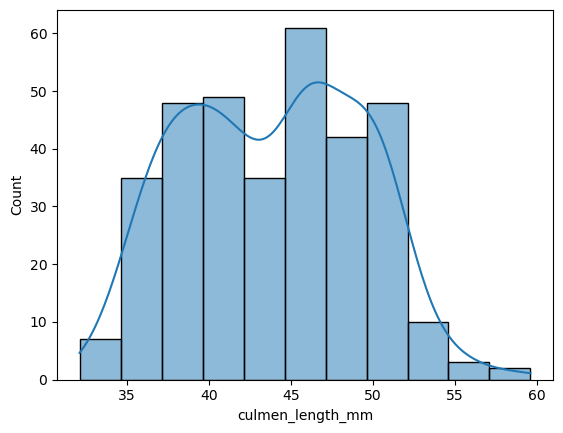

In [57]:
sns.histplot(data=df,x='culmen_length_mm',kde=True)

In [58]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())

C:\Users\Raj\AppData\Local\Temp\ipykernel_19096\2332867476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
